Charles Le Losq
August 2016

This notebook shows examples of how to use the baseline function, and compares the outcomes of using splines over mcahine learning algorithms.
    
First we call the relevant libraries. Note that Scikit Learn SHOULD be installed to your system to use the machine learning algorithms...

In [1]:
using Spectra
using PyPlot
using PyCall

INFO: Recompiling stale cache file /Users/charles/.julia/lib/v0.4/Spectra.ji for module Spectra.


Now we import one of the Raman spectrum from the example data folder, and we plot it to have a nice look at it.

In [2]:
spectra = readdlm("./data/r040.txt")
if spectra[end,1] < spectra[1,1]
    spectra = flipdim(spectra,1)
end

roi = [110. 230.; 1300. 2700.; 3800. 4000]
y_calc, bas = baseline(spectra[:,1],spectra[:,2],roi,"KRregression")

figure()
plot(x,y,"black")
plot(x,y_calc,"blue")
plot(x,bas,"red")

LoadError: LoadError: UndefVarError: x not defined
while loading In[2], in expression starting on line 10

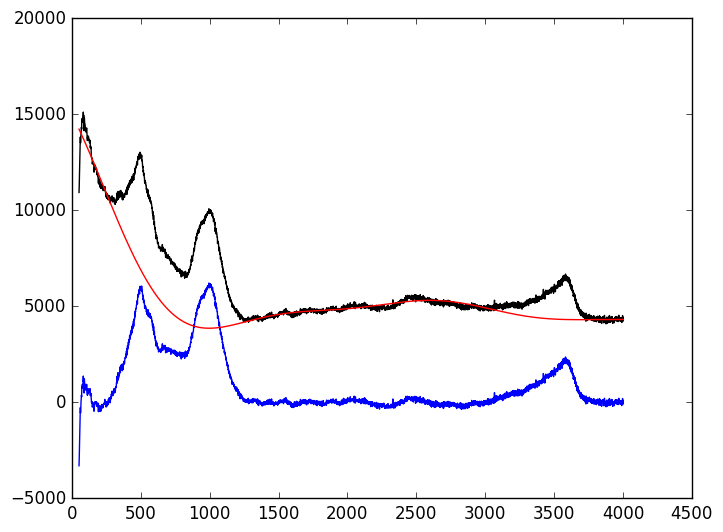

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31bccf810>

In [3]:
x = spectra[:,1]
y = spectra[:,2]
figure()
plot(x,y,"black")
plot(x,y_calc,"blue")
plot(x,bas,"red")

In [ ]:
x = spectra[:,1]
y = spectra[:,2]

x_bas = spectra[(110. .< x .< 230) | (1300 .< x .< 2700.) | (3800 .< x .< 4000.),1]
y_bas = spectra[(110. .< x .< 230) | (1300 .< x .< 2700.) | (3800 .< x .< 4000.),2]

x_bas = reshape(x_bas,size(x_bas,1),1)
y_bas = reshape(y_bas,size(y_bas,1),1)

X_scaler = preprocessing.StandardScaler()
Y_scaler = preprocessing.StandardScaler()

X_scaler[:fit](x_bas)
Y_scaler[:fit](y_bas)

x_bas_sc = X_scaler[:transform](x_bas)
y_bas_sc = Y_scaler[:transform](y_bas)
x_sc = X_scaler[:transform](reshape(x,size(x,1),1))

In [ ]:
clf = kernelridge.KernelRidge(kernel="rbf", gamma=0.1)
kr = grid_search.GridSearchCV(clf,cv=5,param_grid=Dict("alpha"=> [1e0, 0.1, 1e-2, 1e-3,1e-4,1e-5],
                              "gamma"=> np.logspace(-4, 4, 9)))
kr[:fit](x_bas_sc, y_bas_sc)
y_kr_sc = kr[:predict](x_sc)
y_kr = Y_scaler[:inverse_transform](y_kr_sc)

In [ ]:
figure()
plot(x,y,color="black")
plot(x_bas,y_bas,color="green")
plot(x,y_kr,color="red")
kr[:best_params_]